In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load all monthly data files
jan = pd.read_csv('sheets/jan25.csv')
feb = pd.read_csv('sheets/feb25.csv')
mar = pd.read_csv('sheets/march25.csv')
apr = pd.read_csv('sheets/apr25.csv')

# Add a 'Month' column to each dataframe
jan['Month'] = 'January'
feb['Month'] = 'February'
mar['Month'] = 'March'
apr['Month'] = 'April'

# Combine all months into one dataframe
combined = pd.concat([jan, feb, mar, apr], ignore_index=True)

# Display the first few rows to check
combined.head()

,Hotel In General,Unnamed: 1,Excellent,V.Good,Good,Average,Poor,Total,Month
0,Quality Facilities,NaN,11,4,0.0,0,0.0,15,January
1,State of Repair,NaN,8,3,3.0,0,0.0,14,January
2,Cleanliness,NaN,10,4,0.0,0,0.0,14,January
3,Friendliness,NaN,12,1,1.0,0,0.0,14,January
4,Speed & Efficiency of check in,NaN,12,2,0.0,1,0.0,15,January


In [2]:
# Check for missing values
print("\nMissing values in each column:")
print(combined.isnull().sum())

# Fill empty cells with 0 (assuming missing means no responses in that category)
combined.fillna(0, inplace=True)

# Clean column names by removing extra commas
combined.columns = combined.columns.str.strip()

# Check for duplicate entries (noticed duplicate 'Cleanliness' in some files)
print("\nDuplicate rows:")
print(combined.duplicated().sum())

# Remove exact duplicates if any exist
combined = combined.drop_duplicates()

# Verify the cleaned data
print("\nCleaned data summary:")
print(combined.info())


Missing values in each column:
Hotel In General     0
Unnamed: 1          84
Excellent            0
V.Good               0
Good                 1
Average              0
Poor                 3
Total                0
Month                0
dtype: int64

Duplicate rows:
2

Cleaned data summary:
<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 0 to 83
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hotel In General  82 non-null     object 
 1   Unnamed: 1        82 non-null     float64
 2   Excellent         82 non-null     int64  
 3   V.Good            82 non-null     int64  
 4   Good              82 non-null     float64
 5   Average           82 non-null     int64  
 6   Poor              82 non-null     float64
 7   Total             82 non-null     int64  
 8   Month             82 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 6.4+ KB
None


In [3]:
# Calculate satisfaction percentages for each category
def calculate_percentages(df):
    categories = df['Hotel In General'].unique()
    results = []
    
    for category in categories:
        if pd.isna(category):
            continue
            
        subset = df[df['Hotel In General'] == category]
        
        for month in subset['Month'].unique():
            month_data = subset[subset['Month'] == month]
            
            total = month_data['Total'].values[0]
            if total == 0:
                continue
                
            excellent = month_data['Excellent'].values[0] / total * 100
            vgood = month_data['V.Good'].values[0] / total * 100
            good = month_data['Good'].values[0] / total * 100
            average = month_data['Average'].values[0] / total * 100
            poor = month_data['Poor'].values[0] / total * 100
            
            results.append({
                'Category': category,
                'Month': month,
                'Excellent %': excellent,
                'V.Good %': vgood,
                'Good %': good,
                'Average %': average,
                'Poor %': poor,
                'Total Responses': total
            })
    
    return pd.DataFrame(results)

# Calculate percentages
percentages = calculate_percentages(combined)
print("\nSatisfaction percentages:")
percentages.head()
percentages.tail()


Satisfaction percentages:


,Category,Month,Excellent %,V.Good %,Good %,Average %,Poor %,Total Responses
74,Quality of Service Bar,April,100.000000,0.000000,0.000000,0.0,0.0,9
75,Value for Money,January,20.000000,50.000000,20.000000,10.0,0.0,10
76,Value for Money,February,60.000000,40.000000,0.000000,0.0,0.0,5
77,Value for Money,March,75.000000,0.000000,25.000000,0.0,0.0,4
78,Value for Money,April,53.333333,33.333333,13.333333,0.0,0.0,15


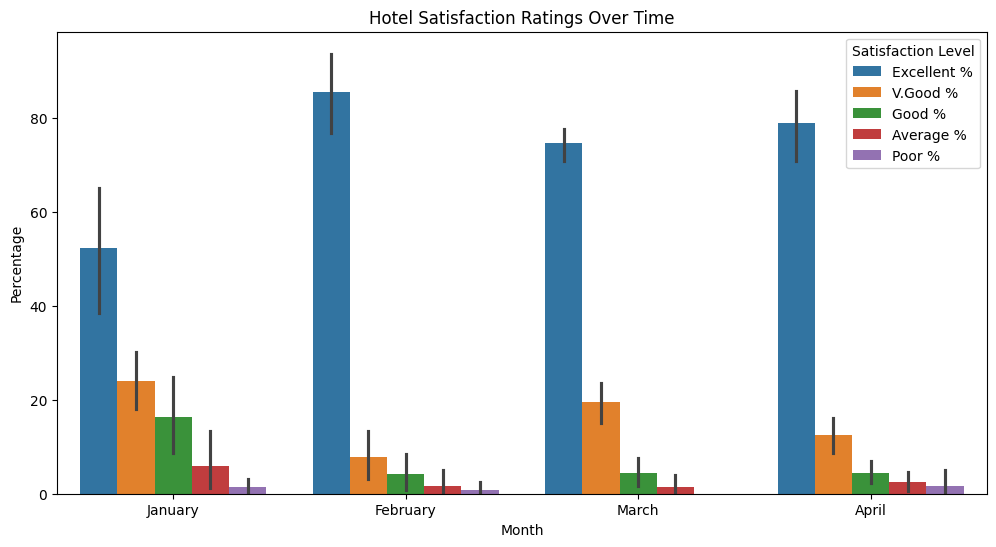

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Melt the dataframe for easier plotting
melted = percentages.melt(id_vars=['Category', 'Month'], value_vars=['Excellent %', 'V.Good %', 'Good %', 'Average %', 'Poor %'],
                          var_name='Satisfaction Level', value_name='Percentage')

# Create a grouped bar chart
sns.barplot(x='Month', y='Percentage', hue='Satisfaction Level', data=melted)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Hotel Satisfaction Ratings Over Time')
plt.legend(title='Satisfaction Level')

# Show the plot
# melted.head()
plt.show()

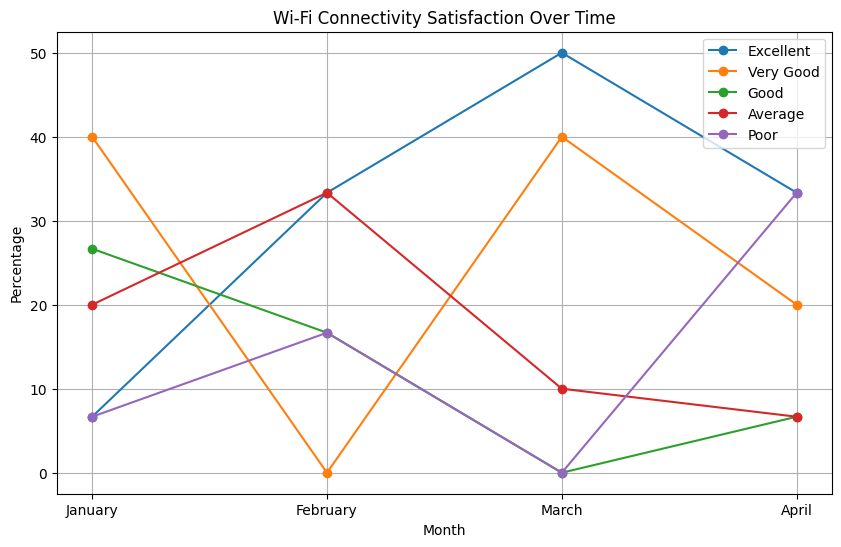

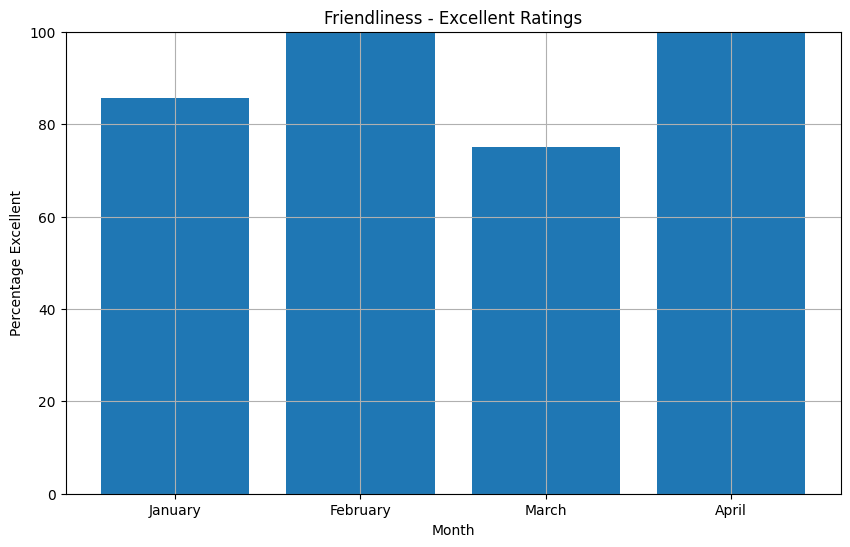

In [5]:
# Plot Wi-Fi connectivity over time
wifi_data = percentages[percentages['Category'] == 'Wi-Fi Connectivity']

plt.figure(figsize=(10, 6))
plt.plot(wifi_data['Month'], wifi_data['Excellent %'], label='Excellent', marker='o')
plt.plot(wifi_data['Month'], wifi_data['V.Good %'], label='Very Good', marker='o')
plt.plot(wifi_data['Month'], wifi_data['Good %'], label='Good', marker='o')
plt.plot(wifi_data['Month'], wifi_data['Average %'], label='Average', marker='o')
plt.plot(wifi_data['Month'], wifi_data['Poor %'], label='Poor', marker='o')
plt.title('Wi-Fi Connectivity Satisfaction Over Time')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

# Plot friendliness over time
friendliness_data = percentages[percentages['Category'] == 'Friendliness']

plt.figure(figsize=(10, 6))
plt.bar(friendliness_data['Month'], friendliness_data['Excellent %'])
plt.title('Friendliness - Excellent Ratings')
plt.xlabel('Month')
plt.ylabel('Percentage Excellent')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [6]:
# Calculate average satisfaction scores across all months
avg_scores = percentages.groupby('Category').mean(numeric_only=True)

# Calculate weighted average score (5=Excellent, 4=V.Good, etc.)
avg_scores['Weighted Score'] = (avg_scores['Excellent %']*5 + avg_scores['V.Good %']*4 + 
                               avg_scores['Good %']*3 + avg_scores['Average %']*2 + 
                               avg_scores['Poor %']*1) / 100

# Sort by weighted score
avg_scores = avg_scores.sort_values('Weighted Score', ascending=False)

print("\nCategories ranked by satisfaction:")
print(avg_scores[['Weighted Score']].round(2))

# Top 5 categories
print("\nTop 5 categories:")
print(avg_scores.head(5)[['Weighted Score']].round(2))

# Bottom 5 categories
print("\nBottom 5 categories:")
print(avg_scores.tail(5)[['Weighted Score']].round(2))


Categories ranked by satisfaction:
                                 Weighted Score
Category                                       
Friendliness                               4.88
Cleanliness                                4.87
Bathroom Cleanliness & hygiene             4.87
Quality of Facilities                      4.86
Bed Comfort                                4.86
Quality Facilities                         4.84
Speed & Efficiency of check out            4.82
Speed & Efficiency of check in             4.81
Quality of Amenities                       4.80
Quality of Service Bar                     4.74
State of Repair                            4.72
Quality of beverages                       4.70
Food Presentation                          4.63
Quality of Service Restaurant              4.59
Variety of beverages                       4.46
Value for Money                            4.32
Quality of Food                            4.30
Variety of Food                            4.15
Pric

C:\Users\jack\AppData\Local\Temp\ipykernel_32744\259759720.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=avg_scores.index, x=avg_scores['Weighted Score'], palette='coolwarm')


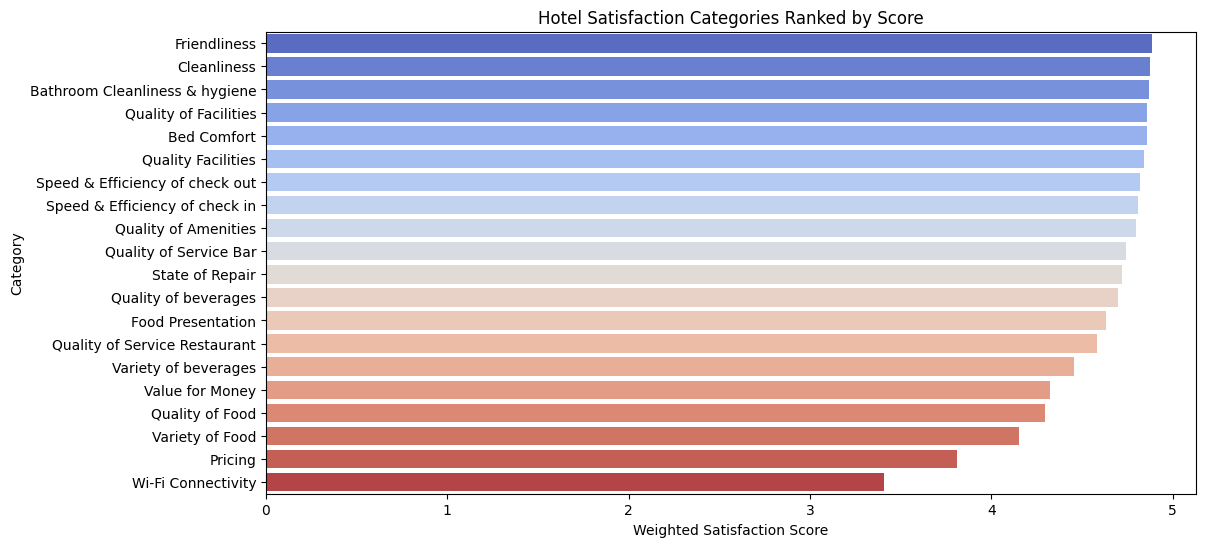

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot
sns.barplot(y=avg_scores.index, x=avg_scores['Weighted Score'], palette='coolwarm')

# Add labels and title
plt.xlabel('Weighted Satisfaction Score')
plt.ylabel('Category')
plt.title('Hotel Satisfaction Categories Ranked by Score')

# Show the plot
plt.show()

In [8]:
# Function to analyze trends for a specific category
def analyze_trend(category):
    cat_data = percentages[percentages['Category'] == category]
    
    # Calculate percentage change from first to last month
    first_month = cat_data[cat_data['Month'] == 'January']
    last_month = cat_data[cat_data['Month'] == 'April']
    
    if len(first_month) == 0 or len(last_month) == 0:
        return None
    
    excellent_change = last_month['Excellent %'].values[0] - first_month['Excellent %'].values[0]
    poor_change = last_month['Poor %'].values[0] - first_month['Poor %'].values[0]
    
    return excellent_change, poor_change

# Analyze trends for all categories
trend_results = []
for category in percentages['Category'].unique():
    changes = analyze_trend(category)
    if changes:
        trend_results.append({
            'Category': category,
            'Excellent Change': changes[0],
            'Poor Change': changes[1]
        })

trend_df = pd.DataFrame(trend_results)

# Most improved categories (biggest increase in Excellent)
most_improved = trend_df.sort_values('Excellent Change', ascending=False).head(5)
print("\nMost improved categories:")
print(most_improved)

# Categories that declined (biggest increase in Poor)
most_declined = trend_df.sort_values('Poor Change', ascending=False).head(5)
print("\nCategories with most decline:")
print(most_declined)


Most improved categories:
                  Category  Excellent Change  Poor Change
11         Quality of Food         62.083333          0.0
15    Variety of beverages         60.714286          0.0
12         Variety of Food         54.807692          0.0
16                 Pricing         50.000000        -12.5
17  Quality of Service Bar         42.857143          0.0

Categories with most decline:
              Category  Excellent Change  Poor Change
10  Wi-Fi Connectivity         26.666667    26.666667
1      State of Repair         36.190476     0.000000
0   Quality Facilities         15.555556     0.000000
2          Cleanliness         23.015873     0.000000
3         Friendliness         14.285714     0.000000


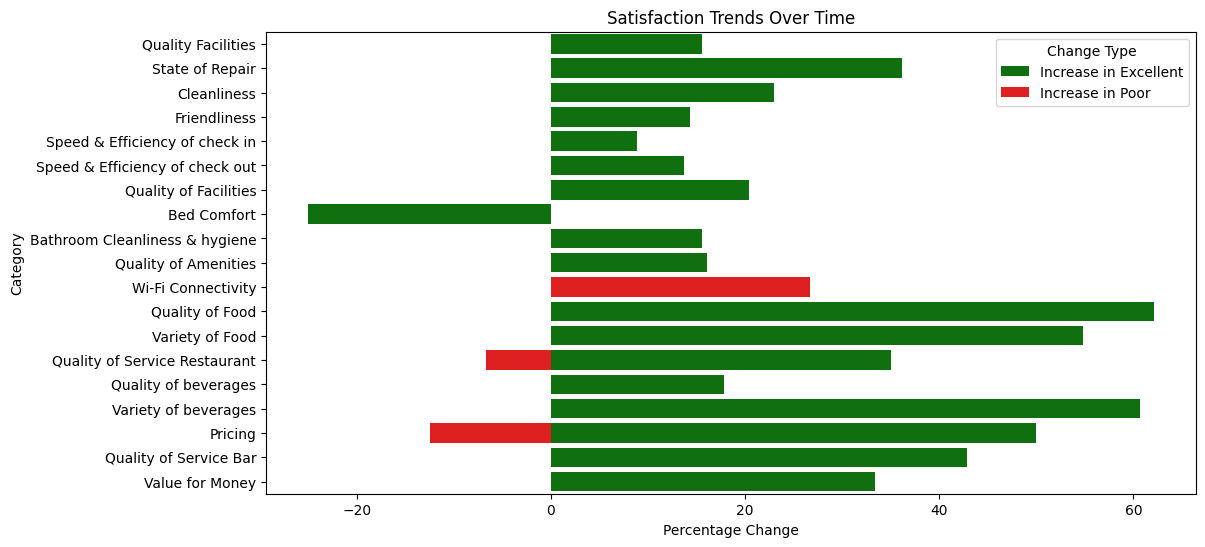

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Create a grouped bar chart for Excellent and Poor changes
sns.barplot(y=trend_df['Category'], x=trend_df['Excellent Change'], color='green', label='Increase in Excellent')
sns.barplot(y=trend_df['Category'], x=trend_df['Poor Change'], color='red', label='Increase in Poor')

# Add labels and title
plt.xlabel('Percentage Change')
plt.ylabel('Category')
plt.title('Satisfaction Trends Over Time')
plt.legend(title='Change Type')

# Show the plot
plt.show()

# Prophet

In [10]:
!pip install prophet

C:\Users\jack\AppData\Local\Temp\ipykernel_32744\3496047983.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wifi_ts['Month'] = pd.to_datetime(wifi_ts['Month'] + ' 2025')
07:08:46 - cmdstanpy - INFO - Chain [1] start processing
07:08:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jack\Documents\Flatiron\envs\hunterz\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


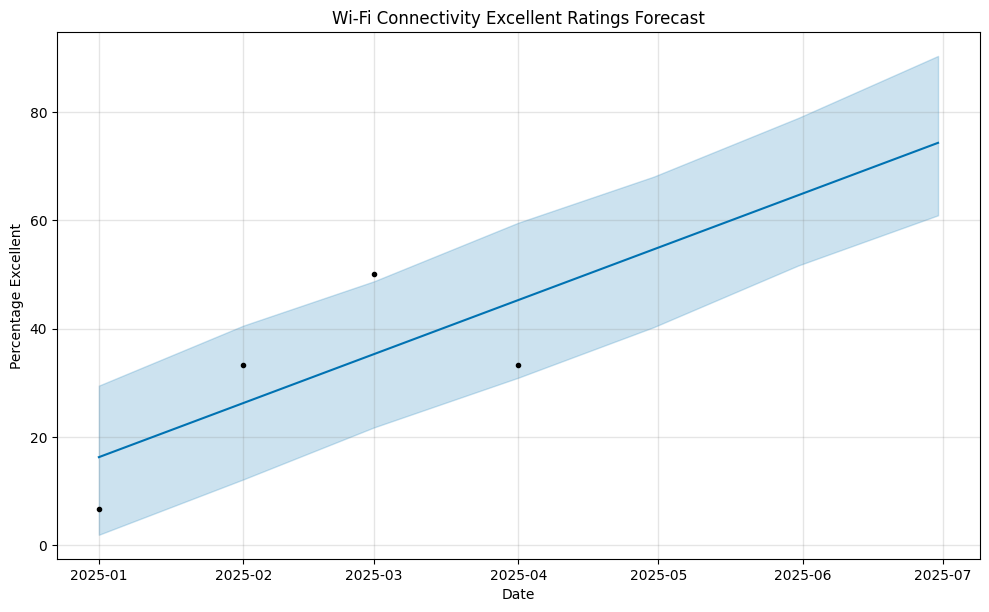

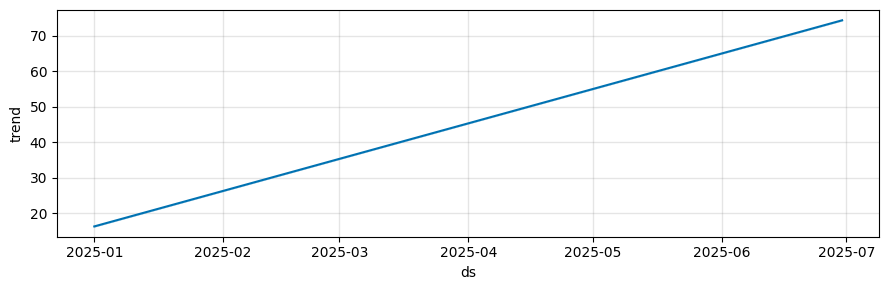

In [11]:
from prophet import Prophet
# Prepare data for forecasting (using Wi-Fi Connectivity as example)
wifi_ts = percentages[percentages['Category'] == 'Wi-Fi Connectivity'][['Month', 'Excellent %']]
wifi_ts['Month'] = pd.to_datetime(wifi_ts['Month'] + ' 2025')
wifi_ts = wifi_ts.rename(columns={'Month': 'ds', 'Excellent %': 'y'})

# Create and fit model
model = Prophet(seasonality_mode='multiplicative')
model.fit(wifi_ts)

# Make future dataframe (next 3 months)
future = model.make_future_dataframe(periods=3, freq='M')
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('Wi-Fi Connectivity Excellent Ratings Forecast')
plt.xlabel('Date')
plt.ylabel('Percentage Excellent')
plt.show()

# Show forecast components
fig2 = model.plot_components(forecast)
plt.show()

# Correlations

In [16]:
# Step 7: Correlation Analysis Between Service Aspects (Final Working Version)

## First Approach: Using melt() instead of stack() for better control
import numpy as np

# Create pivot table
pivot_data = percentages.pivot(index='Month', columns='Category', values='Excellent %')

# Calculate correlation matrix
corr_matrix = pivot_data.corr()

# Create a mask for the upper triangle to avoid duplicates
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Melt the correlation matrix and apply the mask
corr_pairs = corr_matrix.mask(mask).stack().reset_index()
corr_pairs.columns = ['Category1', 'Category2', 'Correlation']

# Remove NA values (from diagonal and lower triangle)
corr_pairs = corr_pairs.dropna()

# Sort by absolute correlation value
corr_pairs['AbsCorrelation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.sort_values('AbsCorrelation', ascending=False)

# Display top correlations
print("\nTop 10 strongest correlations (positive and negative):")
print(corr_pairs.head(10))

## Alternative Approach: Using itertools for combinations
from itertools import combinations

# Get all unique categories
categories = pivot_data.columns.tolist()

# Calculate all pairwise correlations
correlations = []
for cat1, cat2 in combinations(categories, 2):
    corr = pivot_data[cat1].corr(pivot_data[cat2])
    correlations.append({
        'Category1': cat1,
        'Category2': cat2,
        'Correlation': corr
    })

# Create dataframe and sort
corr_df = pd.DataFrame(correlations)
corr_df['AbsCorrelation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values('AbsCorrelation', ascending=False)

# Display results
print("\nTop correlations (alternative method):")
print(corr_df.head(10))

## Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            vmin=-1, vmax=1, center=0, square=True)
plt.title('Service Aspect Correlations (Excellent %)')
plt.tight_layout()
plt.show()

ValueError: cannot insert Category, already exists

In [14]:
# Install required packages if needed
!pip install dash

  Using cached dash-3.0.4-py3-none-any.whl.metadata (10 kB)
  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached importlib_metadata-8.7.0-py3-none-any.whl.metadata (4.8 kB)
Using cached dash-3.0.4-py3-none-any.whl (7.9 MB)
Using cached flask-3.0.3-py3-none-any.whl (101 kB)
Using cached importlib_metadata-8.7.0-py3-none-any.whl (27 kB)

   ---------------------------------------- 0/3 [importlib-metadata]
   ------------- -------------------------- 1/3 [Flask]
   ------------- -------------------------- 1/3 [Flask]
   ------------- -------------------------- 1/3 [Flask]
   ------------- -------------------------- 1/3 [Flask]
   ------------- -------------------------- 1/3 [Flask]
   ------------- -------------------------- 1/3 [Flask]
   ------------- -------------------------- 1/3 [Flask]
   -------------------------- ------------- 2/3 [dash]
   -------------------------- ------------- 2/3 [dash]
   -------------------------- ------------- 2/3 [dash]
   ---------

In [15]:

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Prepare data for dashboard
dashboard_data = percentages.copy()

# Initialize Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Hunter's Paradise Cottages - Customer Feedback Dashboard"),
    
    html.Div([
        dcc.Dropdown(
            id='category-selector',
            options=[{'label': cat, 'value': cat} for cat in dashboard_data['Category'].unique()],
            value='Wi-Fi Connectivity',
            multi=False
        )
    ]),
    
    dcc.Graph(id='monthly-trend'),
    
    html.Div([
        dcc.Graph(id='correlation-heatmap')
    ]),
    
    html.Div([
        html.H3("Key Statistics"),
        html.Div(id='key-stats')
    ])
])

# Define callback for monthly trend
@app.callback(
    Output('monthly-trend', 'figure'),
    [Input('category-selector', 'value')]
)
def update_trend(selected_category):
    filtered_data = dashboard_data[dashboard_data['Category'] == selected_category]
    fig = px.line(filtered_data, x='Month', y=['Excellent %', 'V.Good %', 'Good %', 'Average %', 'Poor %'],
                 title=f'{selected_category} Satisfaction Trend')
    return fig

# Define callback for correlation heatmap
@app.callback(
    Output('correlation-heatmap', 'figure'),
    [Input('category-selector', 'value')]
)
def update_heatmap(selected_category):
    # Get correlation with selected category
    corr_with_selected = correlation_matrix[
        (correlation_matrix['Category1'] == selected_category) | 
        (correlation_matrix['Category2'] == selected_category)
    ].sort_values('Correlation', ascending=False)
    
    fig = px.bar(corr_with_selected, x='Correlation', y='Category2', 
                 title=f'Correlation with {selected_category}')
    return fig

# Define callback for key stats
@app.callback(
    Output('key-stats', 'children'),
    [Input('category-selector', 'value')]
)
def update_stats(selected_category):
    stats = dashboard_data[dashboard_data['Category'] == selected_category].describe()
    return html.Pre(str(stats))

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

ObsoleteAttributeException: app.run_server has been replaced by app.run